In [81]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('..')
from src import funciones as f
from src import soporte_prep as sp

# Importaciones:
# Beautifulsoup
from bs4 import BeautifulSoup

# Requests
import requests

import pandas as pd
import numpy as np

from time import sleep

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
driver = webdriver.Chrome()
url_accidentes = "https://www.one.gob.do/datos-y-estadisticas/"
driver.get(url_accidentes)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/ul/li[2]/a').click()
except:
    print('No encuentro el botón')

sleep(2)

for i in range(2):
    try:
        driver.execute_script("window.scrollBy(0, 500);")  # Desplazarse 1000 píxeles hacia abajo
    except:
        print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/header/div[2]').click()
except:
    print('No encuentro el botón para ampliar')
sleep(2)
try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/header/div[1]').click()
except:
    print('No encuentro el botón para abrir pestañas')
sleep(2)
try:
    driver.execute_script("window.scrollBy(0, 700);")
except:
    print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/div/div/div/div[2]/div/table/tbody/tr[6]/td/a').click()
except:
    print('No encuentro el botón para descargar') #descargo el libro de códigos de accidentes de tráfico, lasdefunciones

try:
    driver.execute_script("window.scrollBy(0, 500);")
except:
    print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/div/div/div/div[2]/div/table/tbody/tr[17]/td/a').click()
except:
    print('No encuentro el botón para descargar') #descargo las defunciones por accidentes de tráfico

# Tablas de Bases de datos

### Tabla principal

In [29]:
df_principal = pd.read_csv('C:\\Users\\DELL\\Downloads\\BD_MUERTES_ACCIDENTES_2007-2023.csv', sep=';')

### Definir lo que significa cada columna

- CAUSA_M: muerte en accidente.
- REGION: region donde ocurrió.
- PROVINCIA: provincia donde ocurrió.
- DIASEMANA: día de la semana.
- MESOCU: mes.
- ANOOCU: año de ocurrencia.
- RHORA: rango de hora.
- TVIA: tipo de vía donde ocurrió.
- SEXO: género de la persona.
- GRUPOEDAD: grupo de edad.
- CONDIVICTIMA: condición de la víctima.
- TIPOACCIDENTE: tipo de accidente.
- MEDIOTRANS: medio de transporte.
- VEHICHOQUE: vehículo con el que chocó.
- ESTRECON: objeto con el que se estralló.

In [30]:
df_principal.head()

,CAUSA_M,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS,ESTRECON,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,APLASTAM,OTROACCIDEN
0,V01-V99,1,9,6,1,2007,10,99,1,5,9,1,2,,8,,,,,,
1,V01-V99,1,9,7,1,2007,1,4,1,12,9,1,2,,1,,,,,,
2,V01-V99,1,9,4,2,2007,11,4,1,4,9,1,2,,1,,,,,,
3,V01-V99,1,9,1,2,2007,6,99,1,1,9,3,25,,,,3,,,,
4,V01-V99,1,9,4,3,2007,10,4,1,5,9,1,2,,4,,,,,,


In [31]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31351 entries, 0 to 31350
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CAUSA_M        31351 non-null  object
 1   REGION         31351 non-null  int64 
 2   PROVINCIA      31351 non-null  int64 
 3   DIASEMANA      31351 non-null  int64 
 4   MESOCU         31351 non-null  int64 
 5   ANOOCU         31351 non-null  int64 
 6   RHORA          31351 non-null  int64 
 7   TVIA           31351 non-null  int64 
 8   SEXO           31351 non-null  int64 
 9   GRUPOEDAD      31351 non-null  int64 
 10  CONDIVICTIMA   31351 non-null  int64 
 11  TIPOACCIDENTE  31351 non-null  int64 
 12  MEDIOTRANS     31351 non-null  int64 
 13  ESTRECON       31351 non-null  object
 14  VEHICHOQUE     31351 non-null  object
 15  VEHICUVOLC     31351 non-null  object
 16  VEHICUATRO     31351 non-null  object
 17  VEHICAIDA      31351 non-null  object
 18  VEHIDESLI      31351 non-n

In [53]:
df_principal.nunique()

REGION             11
PROVINCIA          33
DIASEMANA           7
MESOCU             12
ANOOCU             17
RHORA              13
TVIA               14
SEXO                3
GRUPOEDAD          15
CONDIVICTIMA        4
TIPOACCIDENTE       9
MEDIOTRANS         25
ESTRECON           19
VEHICHOQUE         26
VEHICUVOLC         16
VEHICUATRO         24
VEHICAIDA          19
VEHIDESLI          19
APLASTAM           10
OTROACCIDEN         5
FECHA            1428
dtype: int64

In [33]:
df_principal.drop(columns='CAUSA_M', inplace=True)

In [34]:
df_principal.head()

,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS,ESTRECON,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,APLASTAM,OTROACCIDEN
0,1,9,6,1,2007,10,99,1,5,9,1,2,,8,,,,,,
1,1,9,7,1,2007,1,4,1,12,9,1,2,,1,,,,,,
2,1,9,4,2,2007,11,4,1,4,9,1,2,,1,,,,,,
3,1,9,1,2,2007,6,99,1,1,9,3,25,,,,3,,,,
4,1,9,4,3,2007,10,4,1,5,9,1,2,,4,,,,,,


### Tablas secundarias

In [11]:
driver = webdriver.Chrome()
url_defunciones = "file:///C:/Users/DELL/Downloads/Libro%20de%20c%C3%B3digos%20de%20defunciones%20en%20accidentes%20de%20tr%C3%A1nsito%202007_2023.htm"
driver.get(url_defunciones)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll

In [12]:
sopa_defunciones = BeautifulSoup(driver.page_source)


In [13]:
lista_tablas = sopa_defunciones.findAll('div', {'class': 'itemBody'})


In [14]:
lista_tablas[0]

<div class="itemBody">
<table aria-label="CAUSA_M" class="Default PivotTable" data-col-labels="Valor" data-collabelheight="1" data-column-dimension="Valores;" data-decimal-char="." data-layer-dimension="" data-lookname="Default" data-maxcolwidth="72" data-numcols="1" data-numrows="3" data-row-dimension="Atributos;" data-row-labels="Atributos estándar Etiqueta; Formato;Valores válidos V01-V99" data-rowlabels="Corner" data-rowlabelwidth="2" role="complementary" style="width:280px" summary="CAUSA_M, tabla, 1 niveles de cabeceras de columna y 2 niveles de cabeceras de fila, tabla con 3 columnas y 5 filas">
<caption class="title" style="width:280px">CAUSA_M<span class="details">CAUSA_M, tabla, 1 niveles de cabeceras de columna y 2 niveles de cabeceras de fila, tabla con 3 columnas y 5 filas</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" colspan="2"> </td>
<td class="columnLabels dataAreaLeft vCC role3">Valor</td>
</tr>
<tr>
<td class="rowL

In [54]:
dataframes = []

# Iterar sobre cada tabla en la lista
for i, tabla in enumerate(lista_tablas):
    # Extraer las filas (tr) dentro de cada tabla
    rows = tabla.find_all('tr')

    # Extraer los datos de las celdas
    data = []
    for row in rows:
        cells = row.find_all('td')
        data.append([cell.get_text(strip=True) for cell in cells if cell.get_text(strip=True)])

    # Crear un DataFrame con los datos
    df = pd.DataFrame(data)

    # Guardar el DataFrame en la lista
    dataframes.append(df)

# Ver cuántos DataFrames se generaron
print(f"Se generaron {len(dataframes)} DataFrames.")

Se generaron 21 DataFrames.


In [55]:
type(dataframes)

list

In [56]:
df_region = dataframes[1]
df_provincia = dataframes[2]
df_diasem = dataframes[3]
df_mes = dataframes[4]
df_anio = dataframes[5]
df_rhora = dataframes[6]
df_tipovia = dataframes[7]
df_genero = dataframes[8]
df_gedad = dataframes[9]
df_victima = dataframes[10]
df_accidente = dataframes[11]
df_mediot = dataframes[12]
df_estrello = dataframes[13]
df_vehichoque = dataframes[14]

In [57]:
dataframes_list = [
    df_region, df_provincia, df_diasem, df_mes, df_anio, df_rhora,
    df_tipovia, df_genero, df_gedad, df_victima, df_accidente,
    df_mediot, df_estrello, df_vehichoque
]

for i, df in enumerate(dataframes_list):
    # Recortar las filas a partir de la fila 3
    df = df.iloc[3:]
    
    # Mover el valor de la columna 2 a la columna 1 en la primera fila
    df.iloc[0, 1] = df.iloc[0, 2]
    df.iloc[0,0] = 1
    
    # Seleccionar solo la columna 1
    df = df[[0,1]]
    df = df[:-1]
    df.columns = ['Valor', 'Significado']
    df['Valor'] = df['Valor'].astype('int64')

    # Reiniciar el índice
    df.reset_index(drop=True, inplace=True)
    
    # Guardar el DataFrame transformado de nuevo en la lista
    dataframes_list[i] = df

# Asignar los DataFrames de vuelta a sus variables
df_region, df_provincia, df_diasem, df_mes, df_anio, df_rhora, \
df_tipovia, df_genero, df_gedad, df_victima, df_accidente, \
df_mediot, df_estrello, df_vehichoque = dataframes_list


In [58]:
# Crear la columna de fecha combinando año, mes y día
df_principal['FECHA'] = pd.to_datetime(df_principal['ANOOCU'].astype(str) + '-' + 
                                    df_principal['MESOCU'].astype(str) + '-' + 
                                    df_principal['DIASEMANA'].astype(str), 
                                    format='%Y-%m-%d')

df_principal.head()

,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS,ESTRECON,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,APLASTAM,OTROACCIDEN,FECHA
0,1,9,6,1,2007,10,99,1,5,9,1,2,,8,,,,,,,2007-01-06
1,1,9,7,1,2007,1,4,1,12,9,1,2,,1,,,,,,,2007-01-07
2,1,9,4,2,2007,11,4,1,4,9,1,2,,1,,,,,,,2007-02-04
3,1,9,1,2,2007,6,99,1,1,9,3,25,,,,3,,,,,2007-02-01
4,1,9,4,3,2007,10,4,1,5,9,1,2,,4,,,,,,,2007-03-04


In [59]:
df_llena = df_principal.copy()

In [60]:
# Mover la última columna al principio
ultima_columna = df_llena.columns[-1]  # Obtiene el nombre de la última columna
columnas = [ultima_columna] + [col for col in df_llena.columns if col != ultima_columna]
df_llena = df_llena[columnas]

In [61]:
df_llena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31351 entries, 0 to 31350
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          31351 non-null  datetime64[ns]
 1   REGION         31351 non-null  int64         
 2   PROVINCIA      31351 non-null  int64         
 3   DIASEMANA      31351 non-null  int64         
 4   MESOCU         31351 non-null  int64         
 5   ANOOCU         31351 non-null  int64         
 6   RHORA          31351 non-null  int64         
 7   TVIA           31351 non-null  int64         
 8   SEXO           31351 non-null  int64         
 9   GRUPOEDAD      31351 non-null  int64         
 10  CONDIVICTIMA   31351 non-null  int64         
 11  TIPOACCIDENTE  31351 non-null  int64         
 12  MEDIOTRANS     31351 non-null  int64         
 13  ESTRECON       31351 non-null  object        
 14  VEHICHOQUE     31351 non-null  object        
 15  VEHICUVOLC     3135

In [62]:
df_llena = df_llena.iloc[:,0:13]

In [63]:
df_llena.head()

,FECHA,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS
0,2007-01-06,1,9,6,1,2007,10,99,1,5,9,1,2
1,2007-01-07,1,9,7,1,2007,1,4,1,12,9,1,2
2,2007-02-04,1,9,4,2,2007,11,4,1,4,9,1,2
3,2007-02-01,1,9,1,2,2007,6,99,1,1,9,3,25
4,2007-03-04,1,9,4,3,2007,10,4,1,5,9,1,2


### Guardar los csv

In [64]:
# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_accidente['Valor'], df_accidente['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['TIPOACCIDENTE'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['TIPOACCIDENTE'] = df_llena['TIPOACCIDENTE'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_region['Valor'], df_region['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['REGION'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['REGION'] = df_llena['REGION'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_provincia['Valor'], df_provincia['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['PROVINCIA'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['PROVINCIA'] = df_llena['PROVINCIA'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_diasem['Valor'], df_diasem['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['DIASEMANA'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['DIASEMANA'] = df_llena['DIASEMANA'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_mes['Valor'], df_mes['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['MESOCU'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['MESOCU'] = df_llena['MESOCU'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_rhora['Valor'], df_rhora['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['RHORA'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['RHORA'] = df_llena['RHORA'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_tipovia['Valor'], df_tipovia['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['TVIA'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['TVIA'] = df_llena['TVIA'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_genero['Valor'], df_genero['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['SEXO'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['SEXO'] = df_llena['SEXO'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_gedad['Valor'], df_gedad['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['GRUPOEDAD'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['GRUPOEDAD'] = df_llena['GRUPOEDAD'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_victima['Valor'], df_victima['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['CONDIVICTIMA'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['CONDIVICTIMA'] = df_llena['CONDIVICTIMA'].map(mapeo_filtrado)

# Crear el diccionario de mapeo basado en df_diasem
mapeo_dias = dict(zip(df_mediot['Valor'], df_mediot['Significado']))

# Filtrar el diccionario de mapeo para que solo incluya valores que existen en df_llena['DIASEMANA']
valores_presentes = df_llena['MEDIOTRANS'].unique()  # Valores únicos en DIASEMANA
mapeo_filtrado = {k: v for k, v in mapeo_dias.items() if k in valores_presentes}

# Aplicar el mapeo solo con los valores presentes
df_llena['MEDIOTRANS'] = df_llena['MEDIOTRANS'].map(mapeo_filtrado)

## EDA

El data frame de defunciones nos arroja las siguientes observaciones:
- 31351 filas por 13 columnas
- 721 duplicados, lo cual equivale a menos de un 3% (2.30%). Al eliminarlos, restan 30630 datos
- Los datos van desde el 2007 hasta el 2023, divididos entre los 12 meses del año
    - El año con más muertes producto de accidentes viales fue el 2010 con 2086, seguido del 2019 y 2016 en el top 3
    - El mes con más defunciones fue diciembre con 3151, seguido de marzo y julio
    - El día con más fallecidos fruto de accidentes fue el domingo, seguido de sábado y lunes
    - Las horas con más decunciones son entre 18-20, 20-22 y 16-18. Lo que demuestra un rango alarmante pero a la vez lógico porque estos suelen sus horarios de mucho movimiento vehicular.
    - Las regiones con más víctimas fruto de accidentes son Ozama, Cibao Norte y Cibao Sur
    - Las provincias con más defunciones producto de accidentes son Santo Domingo, San Cristóbal y Santiago
    - El tipo de vía más que más vidas ha cobrado es la Carretera, seguido de la calle y avenida. Aunque la autopista no se queda muy por detrás.
    - El género con mayor cantidad de vidad perdidas es el masculino (87%)
    - el grupo de edad con mayor cantidad de víctimas está entre 20-24, seguido de 25-29 y 15-19. Lo que nos indica que la mayor cantidad de defunciones son de personas jóvenes
    - La condición de la víctima resultando en la presencia de esta en el accidente, en su mayoría no se tiene dicha información. Sin embargo, el segundo lugar lo está ocupado por el conductor como la víctima de dichos accidentes.
    - El tipo de accidente predomina ser choque, seguido de atropellamiento y deslizamiento.
    - El medio de transporte que predomina en los accidentes es la motocicleta, seguido se encuentra el peatón atropellado para ocupar el tercer lugar el automóvil.

In [65]:
df_llena.head()

,FECHA,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS
0,2007-01-06,Región Cibao Norte,Espaillat,Sábado,Enero,2007,18:01-20:00,No declarada,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
1,2007-01-07,Región Cibao Norte,Espaillat,Domingo,Enero,2007,00:01-02:00,Carretera,Hombres,55-59,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
2,2007-02-04,Región Cibao Norte,Espaillat,Jueves,Febrero,2007,20:01-22:00,Carretera,Hombres,15-19,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
3,2007-02-01,Región Cibao Norte,Espaillat,Lunes,Febrero,2007,10:01-12:00,No declarada,Hombres,0-4,No declarada,Atropellamiento,Peatón atropellado
4,2007-03-04,Región Cibao Norte,Espaillat,Jueves,Marzo,2007,18:01-20:00,Carretera,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"


In [66]:
f.exploracion_dataframe(df_llena)

El número de datos es 31351 y el de columnas es 13

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 721

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
FECHA,datetime64[ns]
REGION,object
PROVINCIA,object
DIASEMANA,object
MESOCU,object
ANOOCU,int64
RHORA,object
TVIA,object
SEXO,object
GRUPOEDAD,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna REGION tiene los siguientes valores únicos:


,count
REGION,
Región Ozama,6377
Región Cibao Norte,4644
Región Cibao Sur,3826
Región Valdesia,3489
Región Yuma,2951
Región Cibao Nordeste,2926
Región El Valle,2111
Región Higuamo,2056
Región Cibao Noroeste,1775


La columna PROVINCIA tiene los siguientes valores únicos:


,count
PROVINCIA,
Santo Domingo,4776
San Cristóbal,2373
Santiago,2325
La Vega,2168
La Altagracia,1919
Distrito Nacional,1601
Puerto Plata,1393
Duarte,1186
Monseñor Nouel,1073


La columna DIASEMANA tiene los siguientes valores únicos:


,count
DIASEMANA,
Domingo,7943
Sábado,5112
Lunes,5023
Viernes,3628
Jueves,3343
Martes,3254
Miércoles,3048


La columna MESOCU tiene los siguientes valores únicos:


,count
MESOCU,
Diciembre,3151
Marzo,2688
Julio,2686
Enero,2675
Octubre,2658
Noviembre,2605
Abril,2560
Febrero,2551
Mayo,2537


La columna RHORA tiene los siguientes valores únicos:


,count
RHORA,
18:01-20:00,3779
20:01-22:00,3600
16:01-18:00,2973
10:01-12:00,2581
14:01-16:00,2500
22:01-24:00,2442
00:01-02:00,2432
08:01-10:00,2354
12:01-14:00,2327


La columna TVIA tiene los siguientes valores únicos:


,count
TVIA,
Carretera,13836
Calle,6042
Avenida,4613
Autopista,4530
No declarada,1533
Autovía,340
Bulevar,156
Puente,128
Camino vecinal,83


La columna SEXO tiene los siguientes valores únicos:


,count
SEXO,
Hombres,27389
Mujeres,3891
No declarado,71


La columna GRUPOEDAD tiene los siguientes valores únicos:


,count
GRUPOEDAD,
No declarado,8134
20-24,4017
25-29,2974
15-19,2800
30-34,2365
35-39,1996
65 y más,1756
40-44,1599
45-49,1372


La columna CONDIVICTIMA tiene los siguientes valores únicos:


,count
CONDIVICTIMA,
No declarada,13132
Conductor,12600
Pasajero,2824
Peatón,2795


La columna TIPOACCIDENTE tiene los siguientes valores únicos:


,count
TIPOACCIDENTE,
Choque o colisión,17915
Atropellamiento,5779
Deslizamiento,5216
Estrellamiento,1282
Vuelco o vuelcadura,849
Caída,277
Aplastamiento,18
No declarado,12
Otros,3


La columna MEDIOTRANS tiene los siguientes valores únicos:


,count
MEDIOTRANS,
"Motocicleta, ciclomotor (passola)",19981
Peatón atropellado,5775
Automóvil (carro),2077
"Yipeta, yip",930
Camión,831
Camioneta,723
No declarado,364
Autobús,264
"Minibús, miniván",194


In [67]:
df_llena.duplicated().sum()

721

In [68]:
(df_llena[df_llena.duplicated()].shape[0] / df_llena.shape[0]) * 100

2.2997671525629166

In [69]:
df_llena.drop_duplicates(inplace=True)

In [70]:
df_llena.reset_index(drop=True, inplace=True)

In [72]:
df_llena.shape

(30630, 13)

In [73]:
df_llena['ANOOCU'].value_counts()

ANOOCU
2010    2086
2019    2033
2016    1940
2015    1907
2023    1895
2021    1839
2013    1834
2009    1832
2014    1820
2008    1787
2011    1787
2022    1765
2012    1725
2007    1709
2020    1701
2017    1559
2018    1411
Name: count, dtype: int64

In [75]:
df_llena['SEXO'].value_counts(normalize=True) *100

SEXO
Hombres         87.482860
Mujeres         12.314724
No declarado     0.202416
Name: proportion, dtype: float64

In [76]:
df_num, df_cat = f.separar_dataframes(df_llena)

In [78]:
df_llena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30630 entries, 0 to 30629
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          30630 non-null  datetime64[ns]
 1   REGION         30630 non-null  object        
 2   PROVINCIA      30630 non-null  object        
 3   DIASEMANA      30630 non-null  object        
 4   MESOCU         30630 non-null  object        
 5   ANOOCU         30630 non-null  int64         
 6   RHORA          30630 non-null  object        
 7   TVIA           30630 non-null  object        
 8   SEXO           30630 non-null  object        
 9   GRUPOEDAD      30630 non-null  object        
 10  CONDIVICTIMA   30630 non-null  object        
 11  TIPOACCIDENTE  30630 non-null  object        
 12  MEDIOTRANS     30630 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 3.0+ MB


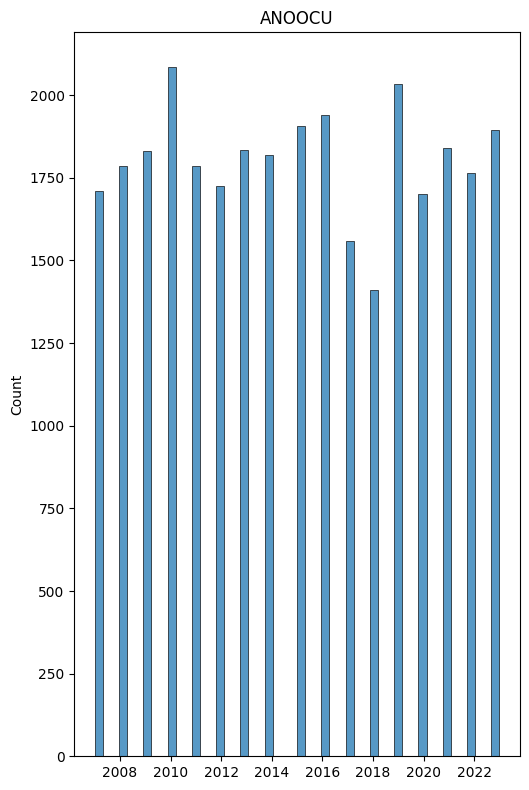

In [77]:
f.plot_numericas(df_num)

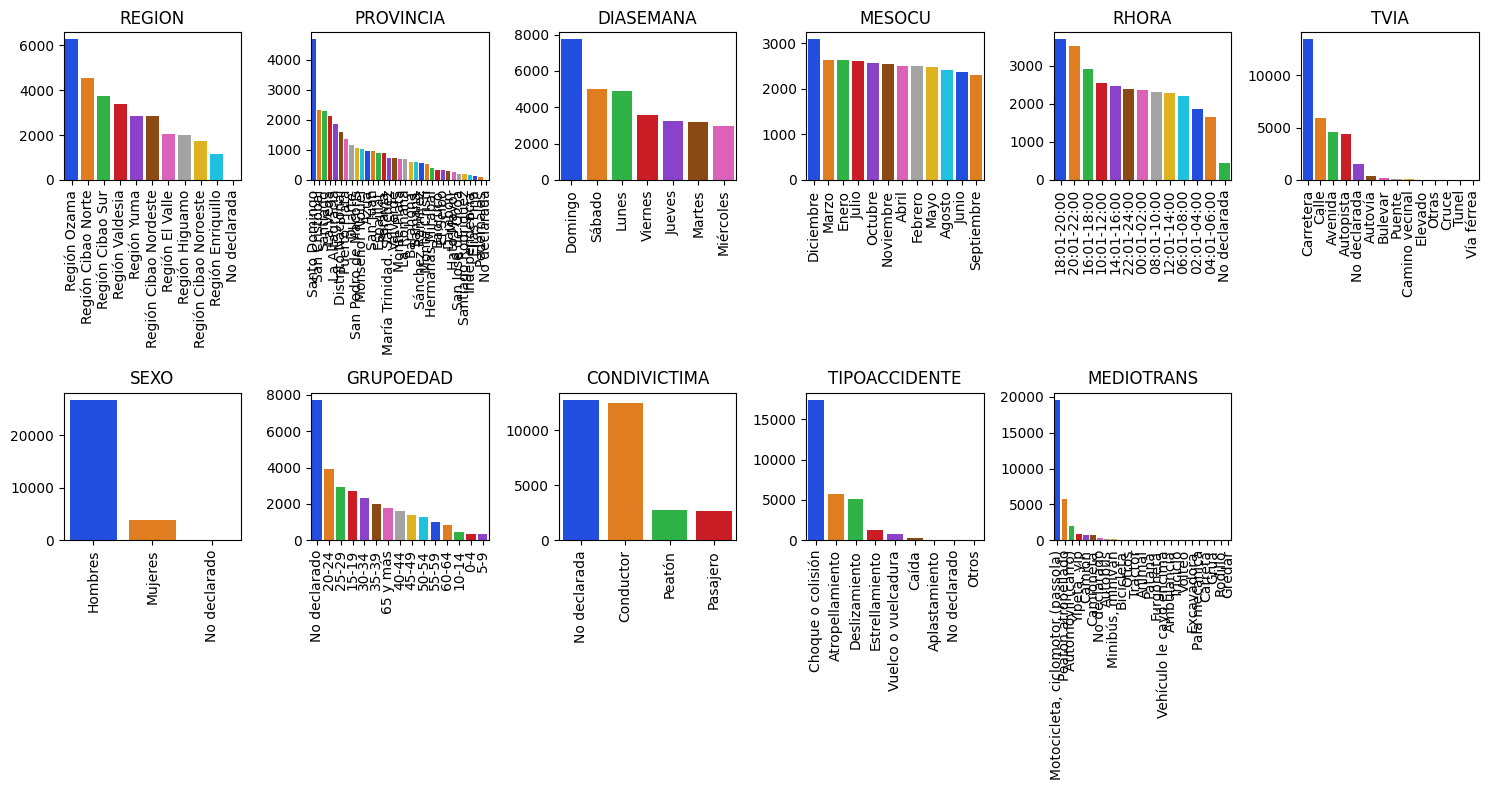

In [79]:
f.plot_categoricas(df_cat)

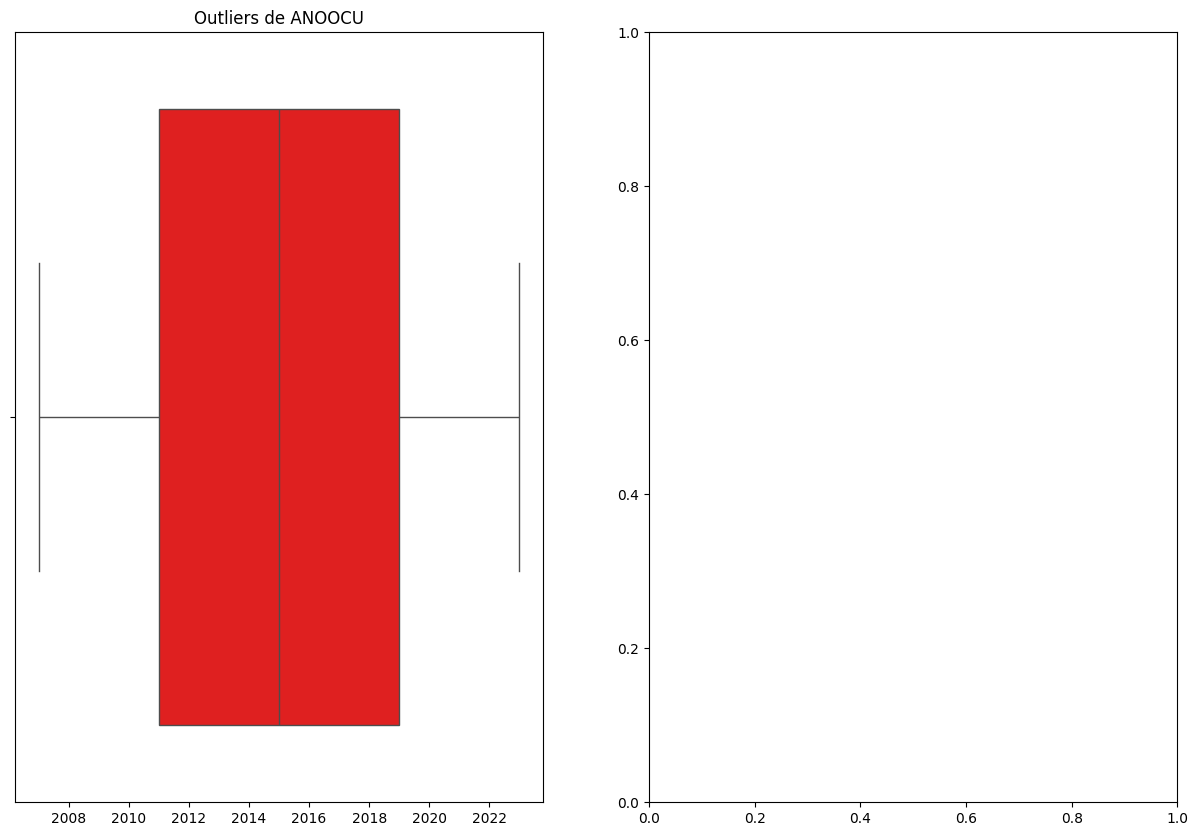

In [80]:
f.detectar_outliers(df_llena)

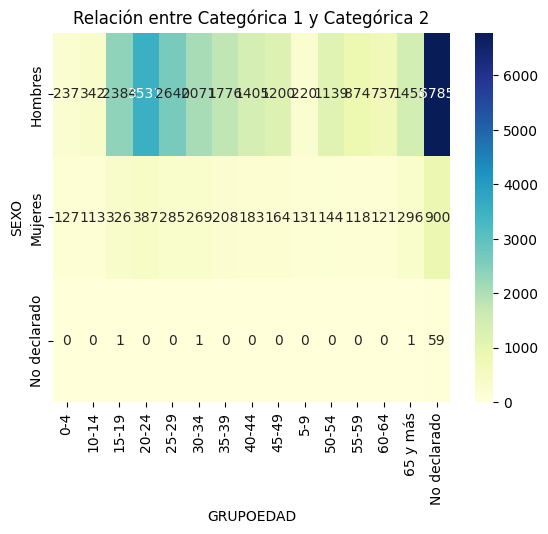

In [83]:
tabla_cruzada = pd.crosstab(df_llena['SEXO'], df_llena['GRUPOEDAD'])

# Visualizar como un heatmap
sns.heatmap(tabla_cruzada, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relación entre Categórica 1 y Categórica 2")
plt.show()